<a href="https://colab.research.google.com/github/lehieu2999/cntt1701_letrunghieubkts2/blob/main/CNTT17_01_L%C3%AA_Trung_Hi%E1%BA%BFu_bkts2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import pandas as pd

# Đường dẫn đến file Excel
file_path = '/content/drive/MyDrive/cntt1701_letrunghieubkts2.xlsx'

# Đọc file Excel
df = pd.read_excel(file_path)

# Hiển thị nội dung file
print(df)


     Năm          Ngành học  Tỷ lệ tốt nghiệp (%)
0   2014  Khoa học máy tính                    61
1   2015  Khoa học máy tính                    61
2   2016  Khoa học máy tính                    85
3   2017  Khoa học máy tính                    77
4   2018  Khoa học máy tính                    76
..   ...                ...                   ...
95  2019         Xã hội học                    52
96  2020         Xã hội học                    96
97  2021         Xã hội học                    82
98  2022         Xã hội học                    89
99  2023         Xã hội học                    63

[100 rows x 3 columns]


In [12]:
import pandas as pd

# Đường dẫn đến file Excel
file_path = '/content/drive/MyDrive/cntt1701_letrunghieubkts2.xlsx'

# Đọc file Excel
df = pd.read_excel(file_path)

# Tính toán các chỉ số thống kê cơ bản
statistics = df.describe()
print("Chỉ số thống kê cơ bản:")
print(statistics)

Chỉ số thống kê cơ bản:
               Năm  Tỷ lệ tốt nghiệp (%)
count   100.000000            100.000000
mean   2018.500000             77.260000
std       2.886751             13.245636
min    2014.000000             51.000000
25%    2016.000000             70.750000
50%    2018.500000             78.000000
75%    2021.000000             86.250000
max    2023.000000            100.000000


📊 Chỉ số thống kê cơ bản:
                      count     mean        std     min      25%     50%  \
Năm                   100.0  2018.50   2.886751  2014.0  2016.00  2018.5   
Tỷ lệ tốt nghiệp (%)  100.0    77.26  13.245636    51.0    70.75    78.0   

                          75%     max  median    variance  
Năm                   2021.00  2023.0  2018.5    8.333333  
Tỷ lệ tốt nghiệp (%)    86.25   100.0    78.0  175.446869  


<ipython-input-19-f533d779f4f3>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Năm", y="Tỷ lệ tốt nghiệp (%)", ci=None)


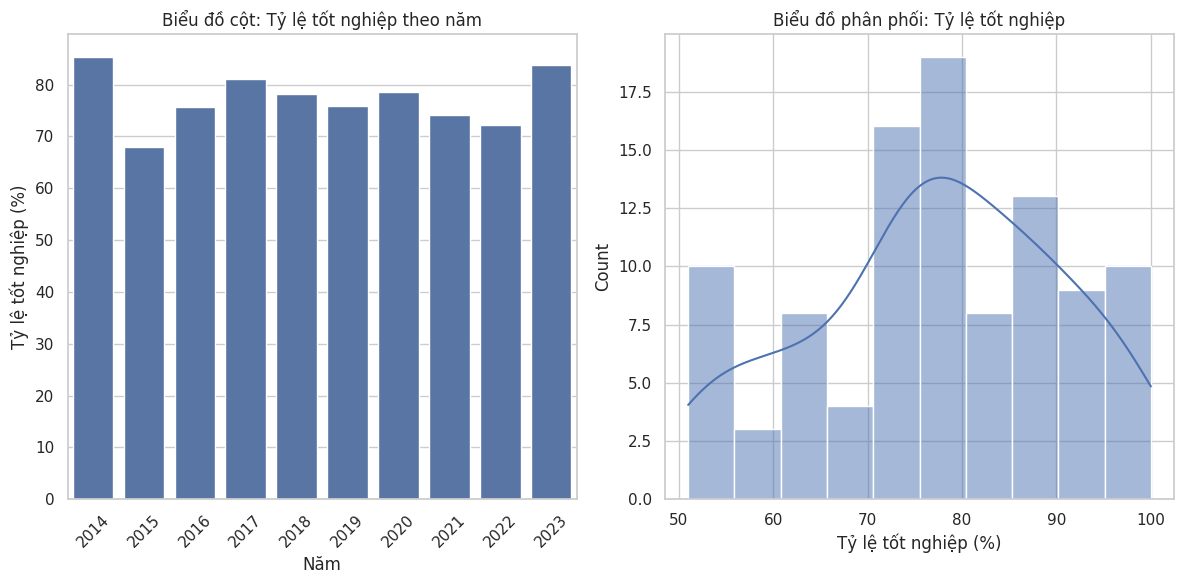

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file Excel
file_path = "/content/drive/MyDrive/cntt1701_letrunghieubkts2.xlsx"  # Đảm bảo đường dẫn đúng
df = pd.read_excel(file_path, engine="openpyxl")

# 1️Tính toán các chỉ số thống kê cơ bản
stats = df.describe().T  # Tính thống kê cơ bản, chuyển vị để dễ đọc
stats["median"] = df.median(numeric_only=True)  # Thêm trung vị
stats["variance"] = df.var(numeric_only=True)  # Thêm phương sai

# In ra bảng thống kê
print("📊 Chỉ số thống kê cơ bản:")
print(stats)

# 2️Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ cột - So sánh một biến theo danh mục
plt.subplot(1, 2, 1)
sns.barplot(data=df, x="Năm", y="Tỷ lệ tốt nghiệp (%)", ci=None)
plt.xticks(rotation=45)
plt.title("Biểu đồ cột: Tỷ lệ tốt nghiệp theo năm")

# Biểu đồ phân phối - Xem sự phân bố của biến số
plt.subplot(1, 2, 2)
sns.histplot(df["Tỷ lệ tốt nghiệp (%)"], kde=True, bins=10)
plt.title("Biểu đồ phân phối: Tỷ lệ tốt nghiệp")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


    Năm          Ngành học  Tỷ lệ tốt nghiệp (%)
0  2014  Khoa học máy tính                    61
1  2015  Khoa học máy tính                    61
2  2016  Khoa học máy tính                    85
3  2017  Khoa học máy tính                    77
4  2018  Khoa học máy tính                    76
 Mean Squared Error (MSE): 182.87
 R² Score: -0.06


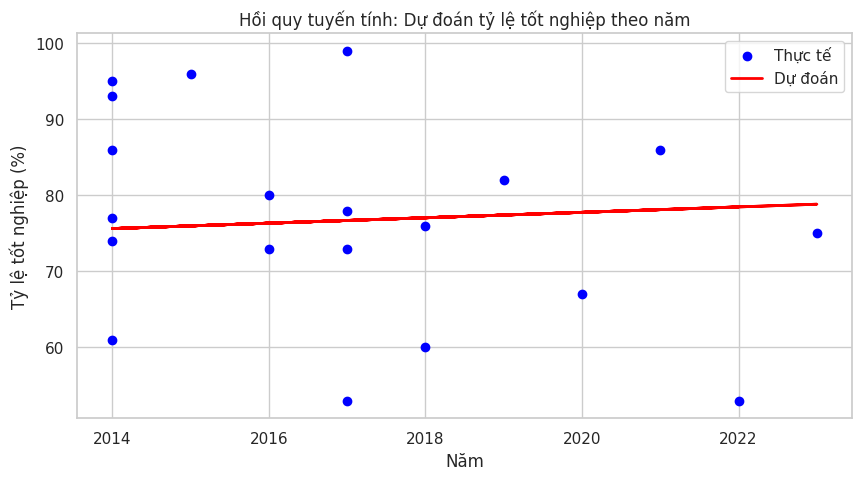

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 4.1. Chuẩn bị dữ liệu
file_path = "/content/drive/MyDrive/cntt1701_letrunghieubkts2.xlsx"  # Đảm bảo đường dẫn đúng
df = pd.read_excel(file_path, engine="openpyxl")

# Kiểm tra dữ liệu
print(df.head())

# Chuyển cột "Năm" thành dạng số
df["Năm"] = df["Năm"].astype(int)

# 4.2. Chia dữ liệu
X = df[["Năm"]]  # Biến độc lập (Năm)
y = df["Tỷ lệ tốt nghiệp (%)"]  # Biến phụ thuộc (Tỷ lệ tốt nghiệp)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.3. Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# 4.4. Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.2f}")

# Vẽ biểu đồ kết quả dự đoán
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color="blue", label="Thực tế")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Dự đoán")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ tốt nghiệp (%)")
plt.title("Hồi quy tuyến tính: Dự đoán tỷ lệ tốt nghiệp theo năm")
plt.legend()
plt.show()


# Mục mới

# Mục mới